In [55]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math
from scipy import stats
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics

import utils 

# define the submission/grader object for this exercise
grader = utils.Grader()
from matplotlib import pyplot

In [56]:
def warmUpExercise():
    """
    Example function in Python which computes the identity matrix.
    
    Returns
    -------
    A : array_like
        The 5x5 identity matrix.
    
    Instructions
    ------------
    Return the 5x5 identity matrix.
    """    
    # ======== YOUR CODE HERE ======
    A = np.eye(5)   # modify this line
    
    # ==============================
    return A

In [57]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [58]:
# appends the implemented function in part 1 to the grader object
grader[1] = warmUpExercise

# send the added functions to coursera grader for getting a grade on this part
grader.grade()


Submitting Solutions | Programming Exercise linear-regression

Use token from last successful submission (fpoosaneh@gmail.com)? (Y/n): 
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Warm up exercise |  10 /  10 | Nice work!
          Computing Cost (for one variable) |   0 /  40 | 
        Gradient Descent (for one variable) |   0 /  50 | 
                      Feature Normalization |   0 /   0 | 
    Computing Cost (for multiple variables) |   0 /   0 | 
  Gradient Descent (for multiple variables) |   0 /   0 | 
                           Normal Equations |   0 /   0 | 
                                  --------------------------------
                                            |  10 / 100 |  



In [59]:
mydata = pd.read_csv('data/ex1data1.txt')

In [60]:
mydata = pd.read_csv('data/ex1data1.txt',names=["Population", "Profit"])

In [61]:
mydata

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [62]:
mydata.isnull()

,Population,Profit
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
92,False,False
93,False,False
94,False,False
95,False,False


In [63]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


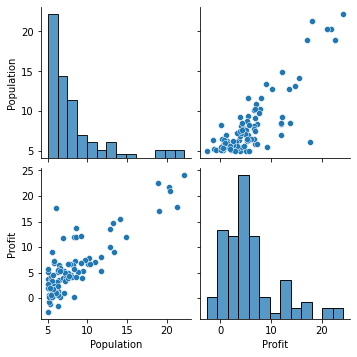

In [64]:
sns.pairplot(mydata)

Text(0, 0.5, 'Profit')

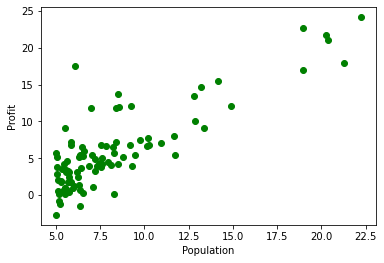

In [65]:
plt.plot(mydata["Population"], mydata["Profit"],marker='o',linestyle='', color='g')
plt.xlabel("Population")
plt.ylabel("Profit")

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [67]:
X1=np.array(mydata["Population"])
y=np.array(mydata["Profit"])
X1

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [68]:
X1.shape

(97,)

In [69]:

y.shape

(97,)

========================================================================================================
# Linear Regression Hyphothesis

# $h_{\theta}(x)=\theta^T x=\theta_0+\theta_1 x_1$

.
   

In [70]:
X0=np.ones(len(mydata))
X=np.array([X0,X1]).transpose()
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [71]:
def hypothesis(X, theta):
    htheta=np.dot(X, theta)
    return htheta

In [72]:
#test example
theta=np.array([6,4])
htheta=hypothesis(X, theta)
htheta.shape

(97,)

In [73]:
htheta

array([30.4404, 28.1108, 40.0744, 34.0128, 29.4392, 39.5316, 35.9056,
       40.3124, 31.9448, 26.2184, 28.8428, 62.656 , 28.936 , 39.6336,
       28.5628, 27.5176, 31.4616, 26.5204, 31.7184, 34.2832, 30.7564,
       87.08  , 27.9604, 31.3044, 28.2596, 81.78  , 57.312 , 49.828 ,
       58.704 , 94.812 , 27.0096, 32.3576, 42.9928, 29.5672, 38.8444,
       37.7336, 38.3836, 28.4252, 57.344 , 31.4136, 27.6276, 33.53  ,
       52.832 , 29.0948, 37.2988, 34.3724, 26.2808, 29.2056, 52.8   ,
       28.1664, 36.1608, 27.2308, 35.6956, 36.4124, 31.3312, 31.4356,
       31.0968, 28.5588, 43.2408, 43.8144, 41.3016, 26.7172, 91.116 ,
       65.632 , 81.836 , 34.8728, 39.1804, 46.944 , 27.9976, 87.364 ,
       46.544 , 35.338 , 30.0248, 34.9036, 26.1076, 32.1916, 36.1544,
       26.146 , 47.096 , 26.4308, 28.9168, 26.7536, 31.4228, 45.0748,
       32.0636, 40.0688, 42.7208, 30.008 , 28.0816, 26.2376, 28.8308,
       36.5464, 29.4828, 27.2216, 39.1736, 59.576 , 27.7476])

================================================================================================
# Cost Function

# $J(\theta)=\frac{1}{2m}{\sum\limits_{i=1}^{
m}}(h_{\theta}(x^{(i)})-y^{(i)})^2$

In [77]:
def computeCost(X,y,theta):
    m=len(y)
    htheta=np.dot(X, theta) 
    jtheta= (htheta-y)**2
    jthetasum=jtheta.sum()/(2*m)
    return jthetasum

In [78]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


In [45]:
grader[2] = computeCost
grader.grade()


Submitting Solutions | Programming Exercise linear-regression

Use token from last successful submission (fpoosaneh@gmail.com)? (Y/n): 
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Warm up exercise |  10 /  10 | Nice work!
          Computing Cost (for one variable) |  40 /  40 | Nice work!
        Gradient Descent (for one variable) |   0 /  50 | 
                      Feature Normalization |   0 /   0 | 
    Computing Cost (for multiple variables) |   0 /   0 | 
  Gradient Descent (for multiple variables) |   0 /   0 | 
                           Normal Equations |   0 /   0 | 
                                  --------------------------------
                                            |  50 / 100 |  



==============================================================================================================
# Gradient Descent

# $\theta_j = \theta_j-\alpha\frac{\partial}{\partial \theta_j}J(\theta_0,\theta_1)$
# which for Linear regression is equivalent to:
# $\theta_j = \theta_j-\frac{\alpha}{m}{\sum\limits_{i=1}^{m}}(h_{\theta}(x^{(i)})-y^i)x^{(i)}$

In [46]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history=[]
    theta=np.zeros((2))
    for i in range(num_iters):
        htheta=np.dot(X, theta) 
        jtheta=computeCost(X,y,theta)
        J_history.append(jtheta)
        descent= (alpha/m)*(np.dot(X.T, np.dot(X, theta) - y))
        theta=theta-descent
        
    return theta,J_history

In [47]:
theta

array([6, 4])

In [48]:
theta=np.zeros((2))
alpha = 0.01
num_iters =1500
theta, J_history= gradientDescent(X, y, theta, alpha, num_iters)
print('Theta found by gradient descent: {:.3f}, {:.3f}'.format(*theta))
print('Expected theta values (approximately): [-3.630, 1.166]')


Theta found by gradient descent: -3.630, 1.166
Expected theta values (approximately): [-3.630, 1.166]


Text(0, 0.5, 'Cost')

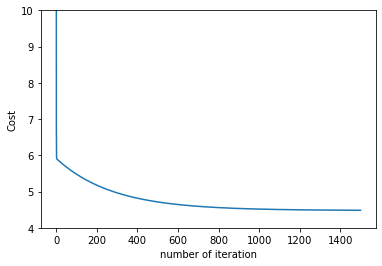

In [49]:
plt.ylim([4,10])
plt.plot(J_history)
pyplot.xlabel('number of iteration')
pyplot.ylabel('Cost')


In [50]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

In [51]:

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

Text(0.5, 1.0, 'Contour, showing minimum')

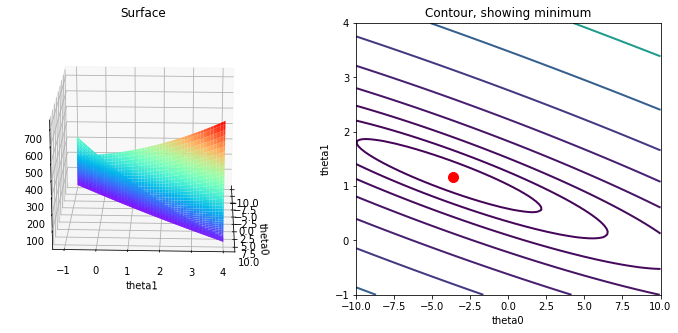

In [52]:
J_vals = J_vals.T
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.view_init(20, 2)
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=plt.cm.rainbow)
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')




ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contour, showing minimum')

In [53]:
grader[3] = gradientDescent
grader.grade()


Submitting Solutions | Programming Exercise linear-regression

Use token from last successful submission (fpoosaneh@gmail.com)? (Y/n): 
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Warm up exercise |  10 /  10 | Nice work!
          Computing Cost (for one variable) |  40 /  40 | Nice work!
        Gradient Descent (for one variable) |   0 /  50 | 
                      Feature Normalization |   0 /   0 | 
    Computing Cost (for multiple variables) |   0 /   0 | 
  Gradient Descent (for multiple variables) |   0 /   0 | 
                           Normal Equations |   0 /   0 | 
                                  --------------------------------
                                            |  50 / 100 |  



# Linear Regresion from obtained $\theta_0, \theta_1$


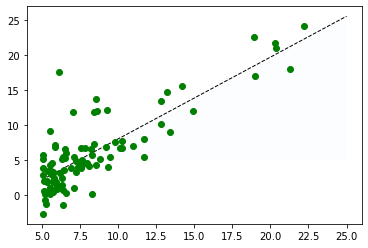

In [54]:
theta0 = -3.63029144
theta1 =1.16636235
xd = np.array([5, 25])
ymin, ymax = 5, 25.
yd = theta0 + theta1*xd
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.plot(mydata["Population"], mydata["Profit"],marker='o',linestyle='', color='g')
plt.fill_between(xd, yd, ymin,  alpha=0.011)